In [ ]:
import pandas as pd 
import numpy as np
import math
from datetime import datetime

In [ ]:
data = pd.read_csv("realEmtHashed.csv")

In [ ]:
data.head()

# Recatagorizing Data
## Changed the column headings to the sender account number with attributes about the sender account as the rows.

In [4]:
test_len = 1000000
data_len = len(data)
new_data = {}
start_time = datetime.now()

for i in range(test_len): 
    row = data.iloc[i]
    sender = row['userID']
    amount = row['money_amount']
    location = (row['latitude'],row['longitude'])
    time = row['timestamp']
    ISP = row['isp']
    receiver = row['payeeEmail']
    
    if sender not in new_data: 
        new_data[sender] = {'transactions':1,'amounts':[],'locations':[],'receivers':{},'time_stamps':[],'senderISP':[]}
    else:
        new_data[sender]['transactions'] += 1
    
    new_data[sender]['amounts'].append(amount)
    new_data[sender]['time_stamps'].append(time)

    if location not in new_data[sender]['locations']:
        new_data[sender]['locations'].append(location)
        
    if ISP not in new_data[sender]['senderISP']:
        new_data[sender]['senderISP'].append(ISP)
        
    if receiver in new_data[sender]['receivers']:
        new_data[sender]['receivers'][receiver] += 1 
    else: 
        new_data[sender]['receivers'][receiver] = 1
        
duration = datetime.now() - start_time
print("Parsed data in: ", duration)

Parsed data in:  0:04:08.676980


# Saving New Dataset

In [5]:
sender = pd.DataFrame.from_dict(new_data)

In [6]:
sender.head()

,044f9d391a27b59859fb3b274237671ff246bb9b69ae7d66db3a7a3875b9520d,3ec92838d15518ea50355e7adfa01d470a7e49479c426db3ffc65befe6a2e622,0f772a1e33aec1998c7a917e5cf67f30eeb485db693c57da470cf67d340c2453,30e1bb678ca1426e122bdb953a2320abbacd14a1dd093b77a4b2f33d84fc937e,5f1331872f036401287146d98e5b7f9d23a24a789b4d72c3731dcabfc67bbc48,a844f08602b27f68ecbe4685991c427948dc3ade39775ea3d29e99bc1c789c1d,800012ea1c431863b68eff6dbf714090466718395a6158b76e62b9e16b63d6f8,01fad62c3e5b6cbf95a26d59abd3249796e56a1caa027b013b470e06ffc4afba,8b11e3e97273699aeca08dbb84f884921c53f7af83144143166db368cb1b7df7,831b7e058c9542cea19d2fecbebf0e838ee5a0ccaabe06e9b13eab2940cd9c0f,...,ec4f245747ca9f7a6271849c0d589ea8bbbb696afecc5a032aafeddccb7e2902,1e0f43e2ad36f42ffa026213e5d3d68156202c8c9e3df170b0d80ffe8ca422c0,9025d8db463a70c3fc5a65d1a14265c573e656594a3cf33062715b12f630a4bd,0638e06cc789de00dc9dbcd532f001c73225a31a1a95a0be4c44aa9bd75a966f,c2b41580c0483aad9a4c65d9f0efb597808ac47c6c736736b020534a38803ee7,7cae234453c0877280cf34c3d5e31b2b626a606e1684f48641cd9d31e0abfeff,52b993f1139403d96c25db7abb0f89c2afb95c84b36d62a6f6cdbd8e0f504987,d90ab110f76522f46b96752622559011f5874dc65ec06cc0815d2789a9cfb032,74384e0ce9ddd7b2389e15af882521f92f5ebb45c5f4671d44dabb6b2264f071,2e9689fd7b2e26a62d479fcd203abcbc79c90e2b463c4fdd556e08023a021719
transactions,3,5,8,2,7,5,3,2,6,2,...,1,1,1,1,1,1,1,1,1,1
amounts,"[500.0, 250.0, 2000.0]","[2571.0, 90.0, 2571.0, 2571.0, 2571.0]","[1025.0, 1025.0, 1025.0, 1025.0, 1025.0, 500.0...","[1510.0, 800.0]","[69.0, 469.0, 69.0, 69.0, 473.0, 69.0, 69.0]","[820.0, 820.0, 820.0, 820.0, 820.0]","[666.66, 725.0, 330.0]","[350.0, 350.0]","[2776.57, 2742.65, 30.0, 776.57, 776.57, 600.0]","[200.0, 100.0]",...,[110.0],[606.5],[25.0],[20.0],[15.0],[85.0],[3000.0],[80.0],[35.0],[84.0]
locations,"[(44.53, -78.75), (43.58, -79.63)]","[(43.89, -78.88), (43.74, -79.59), (43.51, -79...","[(45.73, -73.71), (44.31, -78.36), (43.66, -79...","[(43.65, -79.42)]","[(45.55, -73.58), (45.38, -71.93), (45.64, -73...","[(50.05, -119.29)]","[(48.48, -123.37), (48.44, -123.36)]","[(45.33, -75.67)]","[(49.28, -123.11)]","[(49.92, -96.96)]",...,"[(18.47, -69.9)]","[(52.3, -113.81)]","[(49.27, -123.01)]","[(43.78, -79.42)]","[(49.14, -122.82)]","[(51.16, -114.06)]","[(56.66, -111.14)]","[(45.61, -73.55)]","[(45.08, -66.74)]","[(49.19, -122.94)]"
receivers,{'2fe5ce59f8fbac0fccaca974b9bb08ab4b2afe3d5703...,{'480e4ce89838a108880a7ba13475d9aa92e995476a86...,{'02fc4c55153e0f1645e8c3b24a0d225aa09a3e6806a6...,{'7e28bb7504342ed3806218195ab31d7dcab330cc7511...,{'42ad4701060ceaebd11b09360ca9a24d75d217f90921...,{'a81fd73419341dda2674163e8c5916943968d2857aa8...,{'922efec678a4b9ef3feb83cfa94c2cb3328864a3ea4c...,{'bf6f30e2e6e31010cfcd15eb765b7a4cfc21ff33fe29...,{'99802f30b2029bcc495725c61b51464a4bd5a85ccbf3...,{'f2717c125ac73191416ed910bee13fbaaeb1c90d8a7b...,...,{'1924a20e9664e271fd54cb9284a9560b69bf3a5b6b91...,{'46857fd761cdebd42006a24b5a0edaff5d823e30e290...,{'5d7a6f388abf08468e0e0cb749365a99cbf967dcd578...,{'e1c34211c1c35da3c445210853ca913ef276de0d3759...,{'8377ff3b0cf8a0bf927c4e002d4496315003e5461d83...,{'875c8bf2fd87d21c1c7f8a5d3d8fb710cb5bd86169a7...,{'abfb1d734d0998f71c517e9a31e51199ea98d5d9de08...,{'32ba58abef9d5edeaf3894ae2cca174d934ee9c944a7...,{'ac8e30bbc7d615c1c02f27793989e8c4e507ab5299ab...,{'f66420fc6cf4ea5049c4871e58caf0451a8168e21007...
time_stamps,"[2018-06-01 19:02:54.026-0400, 2018-02-28 23:0...","[2018-06-01 05:37:11.480-0400, 2018-03-01 09:4...","[2018-06-01 00:44:01.691-0400, 2018-04-30 10:5...","[2018-06-01 00:33:22.304-0400, 2018-06-01 00:3...","[2018-06-01 19:27:57.245-0400, 2017-12-01 06:1...","[2018-06-01 00:12:43.788-0400, 2017-12-01 19:5...","[2018-06-01 11:05:43.082-0400, 2017-12-01 15:3...","[2018-06-01 14:00:51.380-0400, 2018-06-15 15:4...","[2018-06-01 15:52:35.582-0400, 2018-05-01 13:4...","[2018-06-01 08:22:02.319-0400, 2018-06-01 15:1...",...,[2018-03-15 06:31:18.675-0400],[2018-03-15 19:57:35.679-0400],[2018-03-15 19:21:33.343-0400],[2018-03-15 00:21:52.587-04

In [7]:
mean_amount = []   

#Mean transaction amount per account ID
for name in sender.iteritems():
    value = name[1]['amounts']
    amount = 0 
    bad_values = 0
    #Using a loop and not sum because the some of the fucks in here are strings
    for item in value:
        try:
            amount += float(item)
        except ValueError: 
            bad_values += 1 
    
    transaction_number = len(value) - bad_values
    
    if transaction_number != 0:
        mean = amount/transaction_number
        mean_amount.append(mean)
    else: 
        mean_amount.append(0)
        
sender.loc['mean_transaction_amount'] = mean_amount

In [8]:
#Standard Deviation for amounts 
std_dev = []
z_score = [] 
for name in sender.iteritems(): 
    value = name[1]['amounts']
    mean = name[1]['mean_transaction_amount']
    variance = 0 
    bad_values = 0 
    for item in value: 
        try: 
            variance += math.pow((float(item) - mean),2)
        except: 
            bad_values += 1
    
    transaction_number = len(value) - bad_values 
    if transaction_number != 0: 
        std = math.sqrt(variance)/transaction_number
        std_dev.append(std)
    else: 
        std_dev.append(0)
        
sender.loc['transacton_std_dev'] = std_dev

In [9]:
#Number of Different ISP's 
ISP_changes = [] 

for name in sender.iteritems(): 
    value = name[1]['senderISP']
    ISP_changes.append(len(value))
    
sender.loc['total_ISPs'] = ISP_changes

In [10]:
def timeBetweenFirstLast(dates):
    '''
    Given a list of dates of the form %Y-%m-%d %H:%M:%S.%f%z return a datetime.timedelta
    object that contains the amount of time between the first and last (chronologically) dates
    '''
    # convert to datetime objects
    datetimes = []
    for date in dates:
        datetimes.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f%z"))
     
    # sort chronologically
    datetimes.sort()

    # return time between first and last dates
    return np.abs(datetimes[-1] - datetimes[0])

transaction_frequency = [] 
for name in sender.iteritems(): 
    value = name[1]['time_stamps']
    difference = timeBetweenFirstLast(value)
    transaction_frequency.append(((difference/name[1]['transactions']).total_seconds())/86400)
#TODO: Rename time between transactions
sender.loc['transaction_frequency'] = transaction_frequency

In [12]:
#Distance from the American Border
distance_from_us = []

for name in sender.iteritems(): 
    value = name[1]['locations'][0]
    y,x = value
    
    if x >= -125.680 and x <= -95.190 or x < -125.680: 
        border = 49.00 
        
    elif x > -95.190 and x <= -82.840: 
        border = -0.591*x - 7.267
        
    elif x > -82.840 and x <= -68.912: 
        border = 0.402*x + 75
        
    elif x > -68.912 and x <= -66.890: 
        border = -2.850*x - 149.159
    
    elif x > -95.19 and x <= -82.84: 
        border = -0.591*x - 7.267
    
    else: 
        border = 44.7 

    distance_from_us.append(abs(y - border))

sender.loc['distance_from_border'] = distance_from_us
# Replacing all the nan values with the average
count = 0
total = 0 

for name in sender.iteritems():
    value = name[1]['distance_from_border']
    if not np.isnan(value):
        count += 1
        total += value
        
average = total/count

for i in range(len(distance_from_us)): 
    if np.isnan(distance_from_us[i]): 
        distance_from_us[i] = average
        
sender.loc['distance_from_border'] = distance_from_us

In [13]:
sender.head(15)

,044f9d391a27b59859fb3b274237671ff246bb9b69ae7d66db3a7a3875b9520d,3ec92838d15518ea50355e7adfa01d470a7e49479c426db3ffc65befe6a2e622,0f772a1e33aec1998c7a917e5cf67f30eeb485db693c57da470cf67d340c2453,30e1bb678ca1426e122bdb953a2320abbacd14a1dd093b77a4b2f33d84fc937e,5f1331872f036401287146d98e5b7f9d23a24a789b4d72c3731dcabfc67bbc48,a844f08602b27f68ecbe4685991c427948dc3ade39775ea3d29e99bc1c789c1d,800012ea1c431863b68eff6dbf714090466718395a6158b76e62b9e16b63d6f8,01fad62c3e5b6cbf95a26d59abd3249796e56a1caa027b013b470e06ffc4afba,8b11e3e97273699aeca08dbb84f884921c53f7af83144143166db368cb1b7df7,831b7e058c9542cea19d2fecbebf0e838ee5a0ccaabe06e9b13eab2940cd9c0f,...,ec4f245747ca9f7a6271849c0d589ea8bbbb696afecc5a032aafeddccb7e2902,1e0f43e2ad36f42ffa026213e5d3d68156202c8c9e3df170b0d80ffe8ca422c0,9025d8db463a70c3fc5a65d1a14265c573e656594a3cf33062715b12f630a4bd,0638e06cc789de00dc9dbcd532f001c73225a31a1a95a0be4c44aa9bd75a966f,c2b41580c0483aad9a4c65d9f0efb597808ac47c6c736736b020534a38803ee7,7cae234453c0877280cf34c3d5e31b2b626a606e1684f48641cd9d31e0abfeff,52b993f1139403d96c25db7abb0f89c2afb95c84b36d62a6f6cdbd8e0f504987,d90ab110f76522f46b96752622559011f5874dc65ec06cc0815d2789a9cfb032,74384e0ce9ddd7b2389e15af882521f92f5ebb45c5f4671d44dabb6b2264f071,2e9689fd7b2e26a62d479fcd203abcbc79c90e2b463c4fdd556e08023a021719
transactions,3,5,8,2,7,5,3,2,6,2,...,1,1,1,1,1,1,1,1,1,1
amounts,"[500.0, 250.0, 2000.0]","[2571.0, 90.0, 2571.0, 2571.0, 2571.0]","[1025.0, 1025.0, 1025.0, 1025.0, 1025.0, 500.0...","[1510.0, 800.0]","[69.0, 469.0, 69.0, 69.0, 473.0, 69.0, 69.0]","[820.0, 820.0, 820.0, 820.0, 820.0]","[666.66, 725.0, 330.0]","[350.0, 350.0]","[2776.57, 2742.65, 30.0, 776.57, 776.57, 600.0]","[200.0, 100.0]",...,[110.0],[606.5],[25.0],[20.0],[15.0],[85.0],[3000.0],[80.0],[35.0],[84.0]
locations,"[(44.53, -78.75), (43.58, -79.63)]","[(43.89, -78.88), (43.74, -79.59), (43.51, -79...","[(45.73, -73.71), (44.31, -78.36), (43.66, -79...","[(43.65, -79.42)]","[(45.55, -73.58), (45.38, -71.93), (45.64, -73...","[(50.05, -119.29)]","[(48.48, -123.37), (48.44, -123.36)]","[(45.33, -75.67)]","[(49.28, -123.11)]","[(49.92, -96.96)]",...,"[(18.47, -69.9)]","[(52.3, -113.81)]","[(49.27, -123.01)]","[(43.78, -79.42)]","[(49.14, -122.82)]","[(51.16, -114.06)]","[(56.66, -111.14)]","[(45.61, -73.55)]","[(45.08, -66.74)]","[(49.19, -122.94)]"
receivers,{'2fe5ce59f8fbac0fccaca974b9bb08ab4b2afe3d5703...,{'480e4ce89838a108880a7ba13475d9aa92e995476a86...,{'02fc4c55153e0f1645e8c3b24a0d225aa09a3e6806a6...,{'7e28bb7504342ed3806218195ab31d7dcab330cc7511...,{'42ad4701060ceaebd11b09360ca9a24d75d217f90921...,{'a81fd73419341dda2674163e8c5916943968d2857aa8...,{'922efec678a4b9ef3feb83cfa94c2cb3328864a3ea4c...,{'bf6f30e2e6e31010cfcd15eb765b7a4cfc21ff33fe29...,{'99802f30b2029bcc495725c61b51464a4bd5a85ccbf3...,{'f2717c125ac73191416ed910bee13fbaaeb1c90d8a7b...,...,{'1924a20e9664e271fd54cb9284a9560b69bf3a5b6b91...,{'46857fd761cdebd42006a24b5a0edaff5d823e30e290...,{'5d7a6f388abf08468e0e0cb749365a99cbf967dcd578...,{'e1c34211c1c35da3c445210853ca913ef276de0d3759...,{'8377ff3b0cf8a0bf927c4e002d4496315003e5461d83...,{'875c8bf2fd87d21c1c7f8a5d3d8fb710cb5bd86169a7...,{'abfb1d734d0998f71c517e9a31e51199ea98d5d9de08...,{'32ba58abef9d5edeaf3894ae2cca174d934ee9c944a7...,{'ac8e30bbc7d615c1c02f27793989e8c4e507ab5299ab...,{'f66420fc6cf4ea5049c4871e58caf0451a8168e21007...
time_stamps,"[2018-06-01 19:02:54.026-0400, 2018-02-28 23:0...","[2018-06-01 05:37:11.480-0400, 2018-03-01 09:4...","[2018-06-01 00:44:01.691-0400, 2018-04-30 10:5...","[2018-06-01 00:33:22.304-0400, 2018-06-01 00:3...","[2018-06-01 19:27:57.245-0400, 2017-12-01 06:1...","[2018-06-01 00:12:43.788-0400, 2017-12-01 19:5...","[2018-06-01 11:05:43.082-0400, 2017-12-01 15:3...","[2018-06-01 14:00:51.380-0400, 2018-06-15 15:4...","[2018-06-01 15:52:35.582-0400, 2018-05-01 13:4...","[2018-06-01 08:22:02.319-0400, 2018-06-01 15:1...",...,[2018-03-15 06:31:18.675-0400],[2018-03-15 19:57:35.679-0400],[2018-03-15 19:21:33.343-0400],[2018-03-15 00:21:52.587-04

# Clustering Data

In [14]:
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [15]:
cluster_amount = 5

In [16]:
mstd = [] 
m_total_transactions = [] 
mtransf = [] 
mean_ISP = [] 
mean_border = [] 

transf_std = [] 
transf_total_transactions = [] 
transf_ISP = [] 
transf_border = [] 

ISP_std = [] 
ISP_total_transactions = [] 
ISP_border = [] 

total_transactions_std = [] 
total_transactions_border = [] 

border_std = [] 

for name in sender.iteritems(): 
    account_num = name[0]
    value = name[1]
    
    total_transaction = value['transactions']
    mean_trans = value['mean_transaction_amount']
    std_trans = value['transacton_std_dev']
    trans_frequency = value['transaction_frequency']
    senderISP = value['total_ISPs']
    distance_us = value['distance_from_border']
    
    mstd.append([mean_trans,std_trans])
    m_total_transactions.append([mean_trans,total_transaction])
    mtransf.append([trans_frequency,mean_trans])
    mean_ISP.append([senderISP,mean_trans])
    mean_border.append([distance_us,mean_trans])
    
    transf_std.append([trans_frequency,std_trans])
    transf_total_transactions.append([trans_frequency,total_transaction])
    transf_ISP.append([senderISP,trans_frequency])
    transf_border.append([distance_us,trans_frequency])
    
    ISP_total_transactions.append([senderISP,total_transaction])
    ISP_std.append([senderISP,std_trans])
    ISP_border.append([senderISP,distance_us])
    
    total_transactions_std.append([total_transaction,std_trans])
    total_transactions_border.append([total_transaction,distance_us]) 

    border_std.append([distance_us,std_trans])

    
all_features = [mstd, m_total_transactions, mtransf, mean_ISP, mean_border, transf_std, transf_total_transactions,
               transf_ISP, transf_border, ISP_std, ISP_total_transactions,ISP_border,total_transactions_std, 
               total_transactions_std, total_transactions_border, border_std] 

for i in range(len(all_features)): 
    all_features[i] = sklearn.preprocessing.scale(all_features[i])

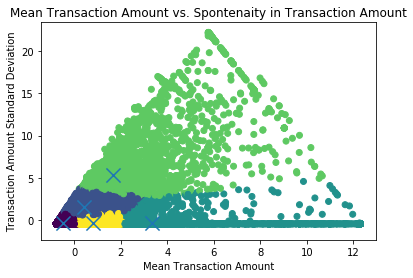

In [17]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[0])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[0]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Mean Transaction Amount vs. Spontenaity in Transaction Amount')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Mean Transaction Amount')
plt.show()

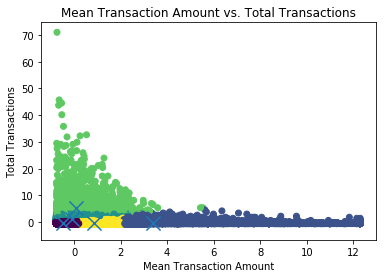

In [18]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[1])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[1]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Mean Transaction Amount vs. Total Transactions')
plt.ylabel('Total Transactions')
plt.xlabel('Mean Transaction Amount')
plt.show()

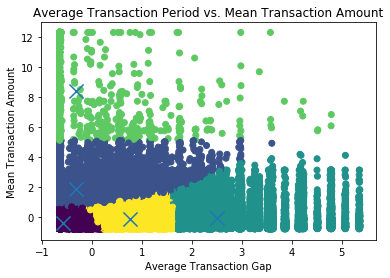

In [19]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[2])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[2]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Mean Transaction Amount')
plt.xlabel('Average Transaction Gap')
plt.ylabel('Mean Transaction Amount')
plt.show()

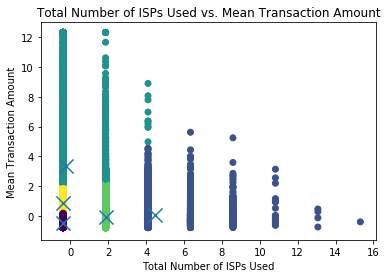

In [20]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[3])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[3]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Number of ISPs Used vs. Mean Transaction Amount')
plt.xlabel('Total Number of ISPs Used')
plt.ylabel('Mean Transaction Amount')
plt.show()

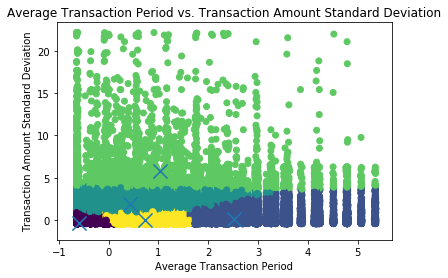

In [21]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[5])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[5]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Average Transaction Period')
plt.show()

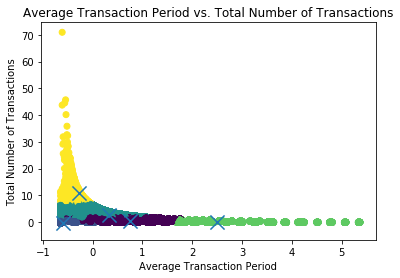

In [22]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[6])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[6]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Total Number of Transactions')
plt.ylabel('Total Number of Transactions')
plt.xlabel('Average Transaction Period')
plt.show()

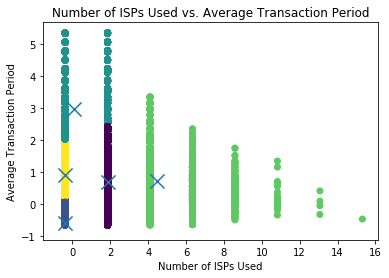

In [23]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[7])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[7]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Average Transaction Period')
plt.xlabel('Number of ISPs Used')
plt.ylabel('Average Transaction Period')
plt.show()

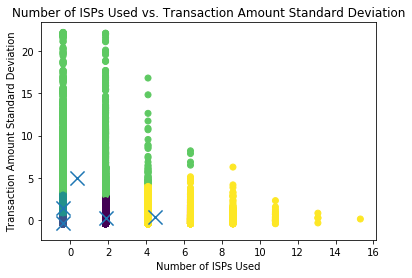

In [24]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[9])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[9]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Number of ISPs Used')
plt.show()

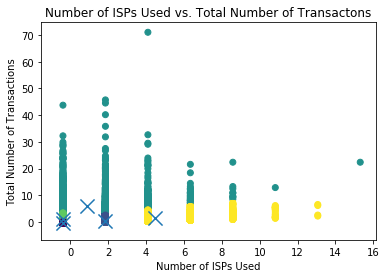

In [25]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[10])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[10]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Total Number of Transactons')
plt.ylabel('Total Number of Transactions')
plt.xlabel('Number of ISPs Used')
plt.show()

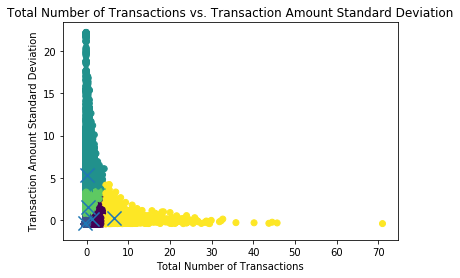

In [26]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[12])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[12]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Number of Transactions vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Total Number of Transactions')
plt.show()

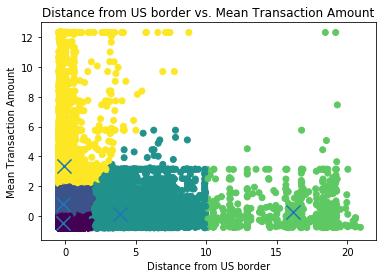

In [27]:
#print(np.shape(mean_border))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[4])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[4]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Distance from US border vs. Mean Transaction Amount')
plt.ylabel('Mean Transaction Amount')
plt.xlabel('Distance from US border')
plt.show()

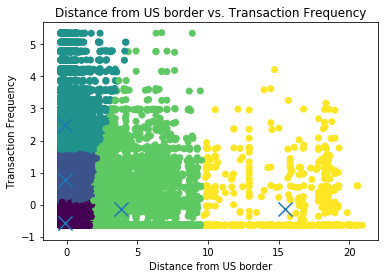

In [28]:
#print(np.shape(mean_border))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[8])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[8]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Distance from US border vs. Transaction Frequency')
plt.ylabel('Transaction Frequency')
plt.xlabel('Distance from US border')
plt.show()

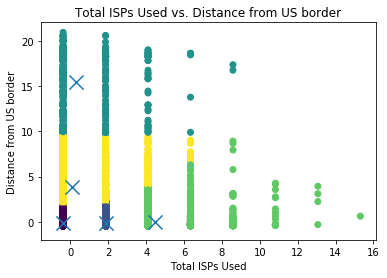

In [29]:
#print(np.shape(mean_border))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[11])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[11]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total ISPs Used vs. Distance from US border')
plt.xlabel('Total ISPs Used')
plt.ylabel('Distance from US border')
plt.show()

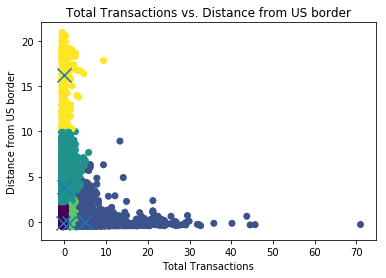

In [30]:
#print(np.shape(mean_border))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[14])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[14]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Transactions vs. Distance from US border')
plt.xlabel('Total Transactions')
plt.ylabel('Distance from US border')
plt.show()

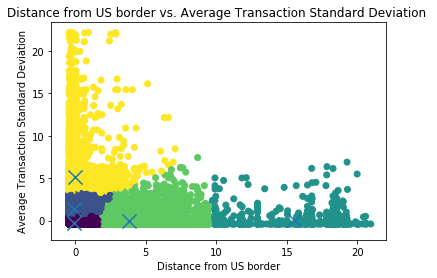

In [31]:
#print(np.shape(mean_border))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(all_features[15])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in all_features[15]: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Distance from US border vs. Average Transaction Standard Deviation ')
plt.xlabel('Distance from US border')
plt.ylabel('Average Transaction Standard Deviation')
plt.show()